<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sales" data-toc-modified-id="Sales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sales</a></span></li><li><span><a href="#Songs-listened" data-toc-modified-id="Songs-listened-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Songs listened</a></span></li><li><span><a href="#Cash-flow" data-toc-modified-id="Cash-flow-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cash flow</a></span></li><li><span><a href="#Usiong-API" data-toc-modified-id="Usiong-API-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Usiong API</a></span></li><li><span><a href="#Cash-flow" data-toc-modified-id="Cash-flow-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cash flow</a></span></li><li><span><a href="#Launch-comparison" data-toc-modified-id="Launch-comparison-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Launch comparison</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import requests

In [4]:
plt.rcParams['figure.figsize'] = [18, 8]

## Sales

In [22]:
sales_url = "https://api.tinybird.co/v0/sql?q=SELECT%20payments.CustomerId%2C%20%0A%20%20%20%20%20%20%20allocations.DeviceDetails_DeviceName%20as%20product_name%2C%0A%20%20%20%20%20%20%20allocations.DeviceDetails_Id%2C%20%0A%20%20%20%20%20%20%20payments.OccurredAt%2C%20%0A%20%20%20%20%20%20%20dateDiff('week'%2C%20allocations.OccurredAt%20%2C%20payments.OccurredAt)%20time_to%0AFROM%20payments%20inner%20join%20allocations%20on%20payments.CustomerId%20%3D%20allocations.CustomerId%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20where%20payments.total_paid%20%3E%3D%20allocations.due%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20and%20(payments.total_paid%20-%20payments.PaymentAmount)%20%3C%20allocations.due%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20FORMAT%20CSVWithNames&token=p.eyJ1IjogImUzMDM2OTIzLTE5MTctNDgzNC1hMTUzLTIzYzhhYjhkNDcyNSIsICJpZCI6ICIzNGNiYjRjMy1mNzJlLTQzNDAtODNiMC1hYzg1MDliOWY1NTcifQ.pC69vV2ZRxWhO0TYM8P91AAodhONp6nDiFS_eQJhbl8&pipeline=launch_comparison"

In [25]:
data = pd.read_csv(sales_url)

In [26]:
data.head()


,CustomerId,product_name,DeviceDetails_Id,OccurredAt,time_to
0,0082b906-a45c-4654-baaf-1e36b73b26ce,MusicMaker3000,56de9ba5-f16e-4087-b2a3-795ad868ec7a,2022-01-20 06:19:29.646,28
1,00f135fd-0577-4033-9898-bf4136034c39,MusicMaker3000,40c496e4-eec6-4e7d-a42a-5137fca4a88c,2021-12-12 04:33:20.295,28
2,01293b04-6621-4439-b420-9864c38f3163,MusicMaker3000,bf5ece0d-9934-4891-ba7d-62dbf115b9a7,2022-02-10 00:25:26.059,20
3,03c56171-7102-45d4-bf05-58c3be0c3c5a,MusicMaker3000,062ceac3-f790-466c-b879-516beb42fa6a,2021-04-12 14:14:35.849,19
4,03de91a9-2ae4-4b87-8b83-fb21a4299012,MusicMaker3000,e5087ab0-508f-4d5c-bfd5-b037e7fbb0f5,2021-12-28 23:50:55.141,16


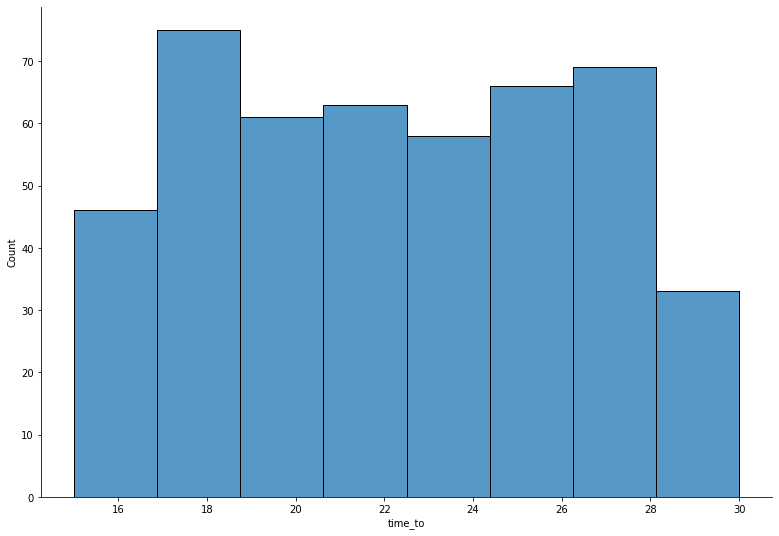

In [33]:
g = sns.displot(data=data, x='time_to', bins=8)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)

## Songs listened

In [50]:
songs_listened_url = "https://api.tinybird.co/v0/sql?q=%25%0ASELECT%20DeviceId%2C%20%0A%20%20%20%20SellingAgent_AgentName%2C%20%0A%20%20%20%20min(toDate(song_listened.OccurredAt))%20start_date%2C%0A%20%20%20%20max(toDate(song_listened.OccurredAt))%20end_date%2C%0A%20%20%20%20count(*)%20num_songs%2C%20%0A%20%20%20%20round(sum(SongCompletedTime)%2F60)%20total_duration%20%0AFROM%20song_listened%20inner%20join%20device_allocated%20using%20(DeviceId)%0A%7B%25%20if%20defined(start_date)%25%7D%0Awhere%20song_listened.OccurredAt%20%3E%20%7B%7Bstart_date%7D%7D%0A%7B%25%20else%20%25%7D%0Awhere%20toDate(song_listened.OccurredAt)%20%3E%20now()%20-%20INTERVAL%203000%20DAY%0A%7B%25%20end%20%25%7D%0Agroup%20by%20DeviceId%2C%20device_allocated.SellingAgent_AgentName%2C%20toMonth(song_listened.OccurredAt)%0Aorder%20by%20num_songs%20desc%20%0A%20FORMAT%20CSVWithNames&token=p.eyJ1IjogImUzMDM2OTIzLTE5MTctNDgzNC1hMTUzLTIzYzhhYjhkNDcyNSIsICJpZCI6ICIzNGNiYjRjMy1mNzJlLTQzNDAtODNiMC1hYzg1MDliOWY1NTcifQ.pC69vV2ZRxWhO0TYM8P91AAodhONp6nDiFS_eQJhbl8&pipeline=songs_listened"

In [51]:
data = pd.read_csv(songs_listened_url)

In [52]:
data.head()

,DeviceId,SellingAgent_AgentName,start_date,end_date,num_songs,total_duration
0,18d5980c-c002-4f97-a081-af808ce8f4f8,Peter Montgomery,2021-05-01,2022-05-31,370,1460
1,b3fe22c2-7c46-4fcf-b8b1-6acfd2755cd3,Peter Montgomery,2021-07-01,2022-07-31,369,1458
2,33c165b9-9dbb-4edb-b617-e4f9b0dca902,Elizabeth Woods,2021-08-01,2022-08-31,368,1460
3,19e0347a-e33c-4330-ba83-c076bac94951,Susan Wagner,2021-08-01,2022-08-31,367,1460
4,928f8a93-0b65-48ca-8acf-04ad4667e5ab,Jorge Sullivan,2021-10-01,2022-10-31,367,1451


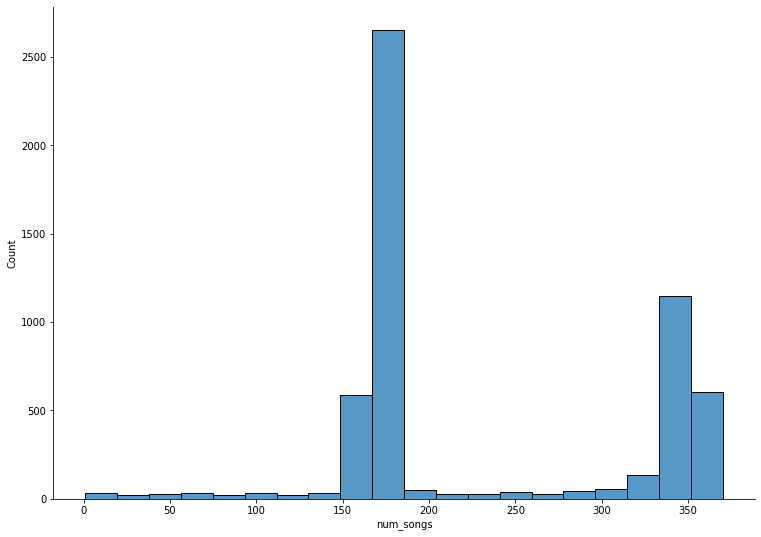

In [57]:
g=sns.displot(data=data, x='num_songs')
g.fig.set_figwidth(12)
g.fig.set_figheight(8)

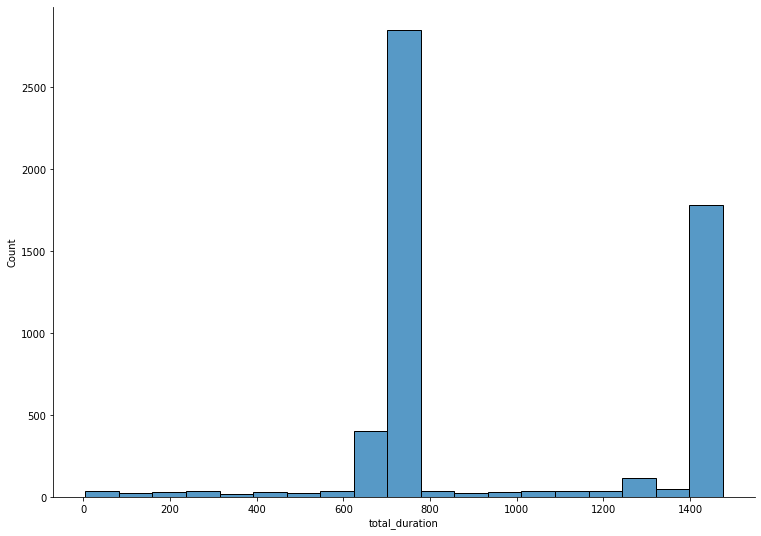

In [58]:
g=sns.displot(data=data, x='total_duration')
g.fig.set_figwidth(12)
g.fig.set_figheight(8)

## Cash flow

In [41]:
cash_flow_url= "https://api.tinybird.co/v0/sql?q=SELECT%20*%20FROM%20payments%20inner%20join%20expenses%20using%20(period)%20%0A%20FORMAT%20CSVWithNames&token=p.eyJ1IjogImUzMDM2OTIzLTE5MTctNDgzNC1hMTUzLTIzYzhhYjhkNDcyNSIsICJpZCI6ICIzNGNiYjRjMy1mNzJlLTQzNDAtODNiMC1hYzg1MDliOWY1NTcifQ.pC69vV2ZRxWhO0TYM8P91AAodhONp6nDiFS_eQJhbl8&pipeline=cash_flow"

In [42]:
data = pd.read_csv(cash_flow_url)

In [43]:
data.head()

,period,cash_in,cash_out
0,202103,7799.400077,14000
1,202206,19398.200291,12000
2,202201,16449.800232,13000
3,202012,4932.600027,14000
4,202011,3944.400009,13500


In [44]:
data['year']=data.period // 100


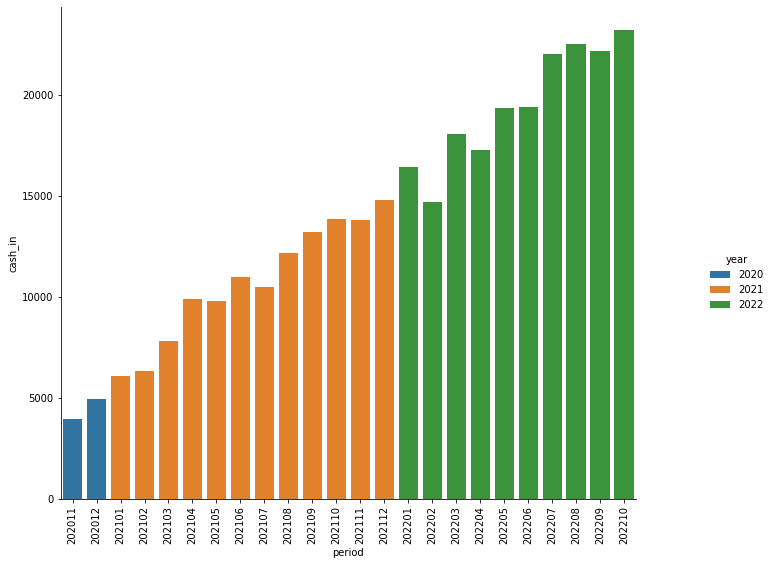

In [45]:
ax = sns.catplot(data=data, x='period', y='cash_in', hue='year', kind='bar', dodge=False)
ax.set_xticklabels(rotation=90)
ax.fig.set_figwidth(12)
ax.fig.set_figheight(8)

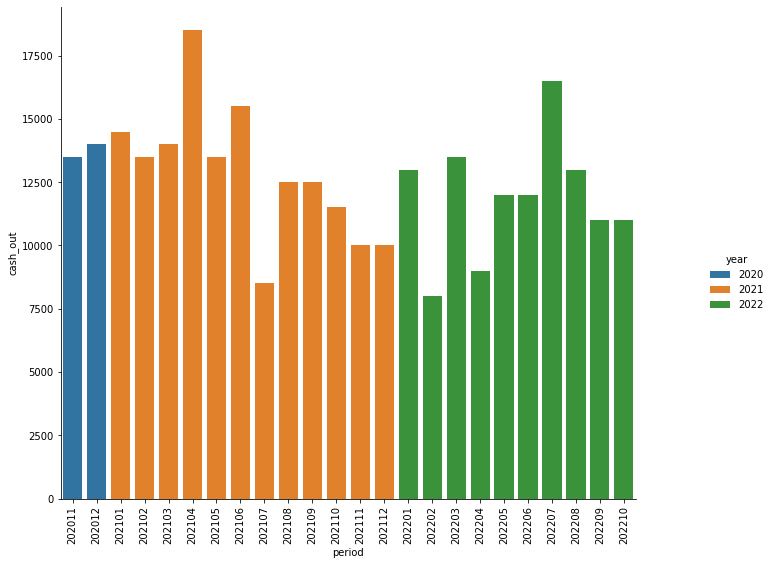

In [46]:
ax = sns.catplot(data=data, x='period', y='cash_out', hue='year', kind='bar', dodge=False)
ax.set_xticklabels(rotation=90)
ax.fig.set_figwidth(12)
ax.fig.set_figheight(8)

## Usiong API

In [11]:
class TinyBird():
    def __init__(self):
        pass
    
    def call(self, url, params):
            
        response = requests.get(url, params=params)
        
        if response.ok:
            return pd.DataFrame(response.json().get('data'))
        else:
            return None

In [13]:
class JukeboxInc():
    def __init__(self):
        pass
    def cash_flow(self):
        token = 'p.eyJ1IjogImUzMDM2OTIzLTE5MTctNDgzNC1hMTUzLTIzYzhhYjhkNDcyNSIsICJpZCI6ICJiMmI2MDYyNy01N2I5LTRjZDgtOTk4YS0zOTgwYTk2MmFkNTAifQ.i-PWmlF3XNleBAQSAY5G-M7cgdB-sqW3bUgu4B3xAD0'
        tn = TinyBird()
        return tn.call('https://api.tinybird.co/v0/pipes/cash_flow.json',
                      { 'token':token }
                      )
    def product_sales(self, product_name='MusicMaker3000'):                
        token = 'p.eyJ1IjogImUzMDM2OTIzLTE5MTctNDgzNC1hMTUzLTIzYzhhYjhkNDcyNSIsICJpZCI6ICI1NmNjYjVmMi1lZGJlLTRiYmUtOWM0My1jZjM2NGNhNzgwMzIifQ.4WaqnFjM26kfWfk8AMWxPXbQiyqjKjIxtvS0A5QUVCM'
        url = 'https://api.tinybird.co/v0/pipes/launch_comparison.json'
        return tn.call(url, {'token':token, 'product_name': product_name})

In [14]:
jb = JukeboxInc()

## Cash flow

In [21]:
cash_flow = jb.cash_flow()

In [35]:
cash_flow.head()

,CustomerId,expected,total_paid
0,d6af0784-07ec-453d-a409-1ec0a0ba1cef,89.700000,34.600001
1,57d1d1db-50ea-405c-9ee5-e6a51f357bc3,34.720001,34.800001
2,63a9d0d1-506b-449b-9939-d5b00f84dbfc,34.760001,33.600001
3,c8efe5b8-59f7-4904-a522-3fa48d3606a3,34.080001,33.800000
4,31e7404e-3027-441f-b6e9-d95facaf8fe5,34.960001,34.000001


In [47]:
cash_flow['diff'] = cash_flow['expected'] - cash_flow['total_paid']
cash_flow['balance'] = np.where(cash_flow['diff'] > 0, 'Positive', 'Negative')

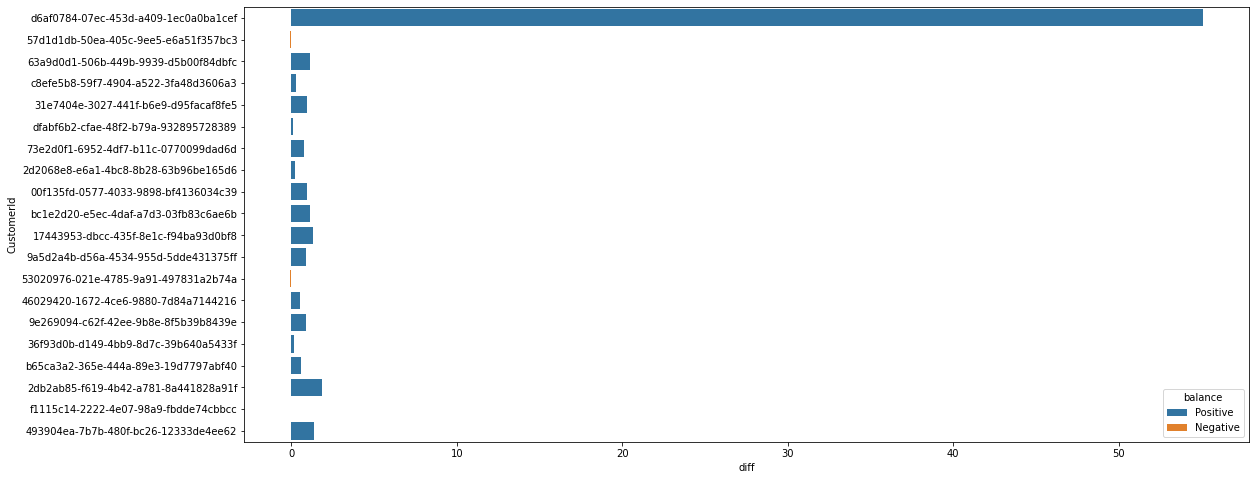

In [48]:
ax = sns.barplot(data=cash_flow.head(20), y='CustomerId', x='diff', hue='balance', dodge=False)

## Launch comparison

In [18]:
product_sales = jb.product_sales()

In [19]:
product_sales.head()

,product_name,week,num_sold
0,MusicMaker3000,1,1
1,MusicMaker3000,2,2
2,MusicMaker3000,3,1
3,MusicMaker3000,4,3
4,MusicMaker3000,5,5


<AxesSubplot:xlabel='week', ylabel='num_sold'>

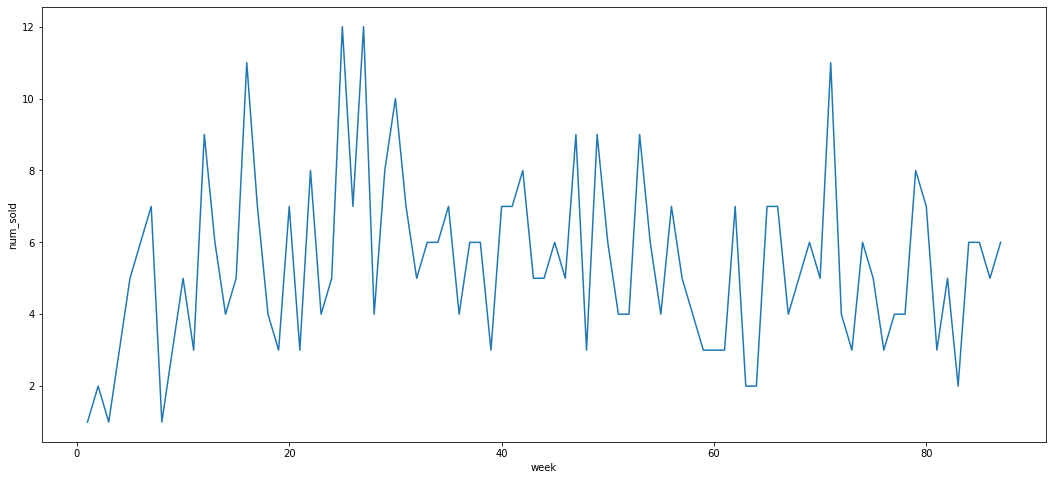

In [20]:
sns.lineplot(data=product_sales, x='week', y='num_sold')